In [ ]:
# Cú pháp chính

from sklearn.linear_model import LinearRegression

# Khởi tạo mô hình
model = LinearRegression()

# Huấn luyện mô hình
model.fit(X_train, y_train)

# Dự đoán:
y_pred = model.predict(X_test)

# Lấy hệ số
print("Hệ số (coefficients):", model.coef_)
print("Độ lệch (intercept):", model.intercept_)



In [ ]:
# Một số thư viện đi kèm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Khởi tạo mô hình
model = LinearRegression()

# Chia tập huấn luyện
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42)

# Huấn luyện
model.fit(X_train, y_train)

# Dự đoán
y_pred = model.predict(X_test)

#Đánh giá mô hình
mse = mean_squared_error(y_test, y_pred)

print(f"mse: {mse}")



In [ ]:
# Ví dụ code mẫu

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Dữ liệu mẫu
X = [[1], [2], [3], [4], [5]]
y = [2, 4, 6, 8, 10]  # y = 2*x

# Chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo và huấn luyện
model = LinearRegression()
model.fit(X_train, y_train)

# Dự đoán
y_pred = model.predict(X_test)

# In kết quả
print("Hệ số:", model.coef_)
print("Intercept:", model.intercept_)
print("MSE:", mean_squared_error(y_test, y_pred))


Hệ số: [2.]
Intercept: 0.0
MSE: 0.0


In [ ]:
# Huấn luyện AI dự đoán giá nhà
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

# Bước 1: Tải dữ liệu
url = "https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv"
data = pd.read_csv(url)
print("Dữ liệu ban đầu:")
print(data.head())


# Bước 2: Xử lý dữ liệu
    # Xử lý Missing Value

    # Kiểm tra dữ liệu thiếu: # Số lượng giá trị thiếu theo từng cột
print(data.isnull().sum())

    # Tính phần trăm thiếu
print(data.isnull().mean() * 100)

    # # Điền trung bình
# data['total_bedrooms'].fillna(data['total_bedrooms'].median(), inplace=True)

# # Kiểm tra dữ liệu thiếu: # Số lượng giá trị thiếu theo từng cột
# print(data.isnull().sum())

data.dropna(inplace=True)

def analyze_distribution(df, column):
    x = df[column]
    skewness = skew(x)
    kurt = kurtosis(x)

    print(f"\n📊 Phân tích cột: {column}")
    print(f"Skewness (độ lệch): {skewness:.3f}")
    print(f"Kurtosis (độ nhọn): {kurt:.3f}")

    # Gợi ý biến đổi
    if skewness > 1:
        suggestion = "→ Lệch phải mạnh → Dùng log(x + 1) hoặc sqrt(x)"
    elif skewness > 0.5:
        suggestion = "→ Lệch phải nhẹ → Dùng sqrt(x)"
    elif skewness < -1:
        suggestion = "→ Lệch trái mạnh → Dùng x^2 hoặc x^3"
    elif skewness < -0.5:
        suggestion = "→ Lệch trái nhẹ → Có thể thử x^2"
    else:
        suggestion = "→ Phân phối gần chuẩn → Có thể giữ nguyên"

    print(suggestion)

    # Vẽ biểu đồ phân phối
    plt.figure(figsize=(10, 4))
    sns.histplot(x, kde=True, bins=30)
    plt.title(f"Phân phối của '{column}' (skew={skewness:.2f})")
    plt.xlabel(column)
    plt.show()

analyze_distribution(data, 'dien_tich')
analyze_distribution(data, 'gia')


#  Xử lý biến phân loại (Categorical Encoding) :  Chuyển đổi cột 'ocean_proximity' sang dạng số
data = pd.get_dummies(data, columns=['ocean_proximity'], drop_first=True)


# Chia dữ liệu thành đầu vào (X) và đầu ra (y)
X = data.drop(columns=['median_house_value'])
y = data['median_house_value']

# Chuẩn hóa dữ liệu
scaler = MinMaxScaler()

# Chia thành tập train và test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Bước 3: Huấn luyện mô hình
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Bước 4: Đánh giá mô hình
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)

    #Sai số trung bình tuyệt đối
    mae = mean_absolute_error(y_test, y_pred)

    # Sai số bình phương trung bình
    mse = mean_squared_error(y_test, y_pred)

    # Sai số phần trăm trung bình tuyệt đối
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

   # Độ chính xác theo R2
    r2 = r2_score(y_test, y_pred)

    print(f"{model.__class__.__name__}")
    print(f"  - MAE: {mae:.4f}")
    print(f"  - MSE: {mse:.4f}")
    print(f"  - R² Score: {r2:.4f}")
    print(f"  - MAPE: {mape:.2f}%")  # Tính sai số phần trăm

evaluate_model(lr_model, X_test, y_test)




Dữ liệu ban đầu:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
longitude               0
latitude                0
housin

Dữ liệu ban đầu:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
longitude               0
latitude                0
housin

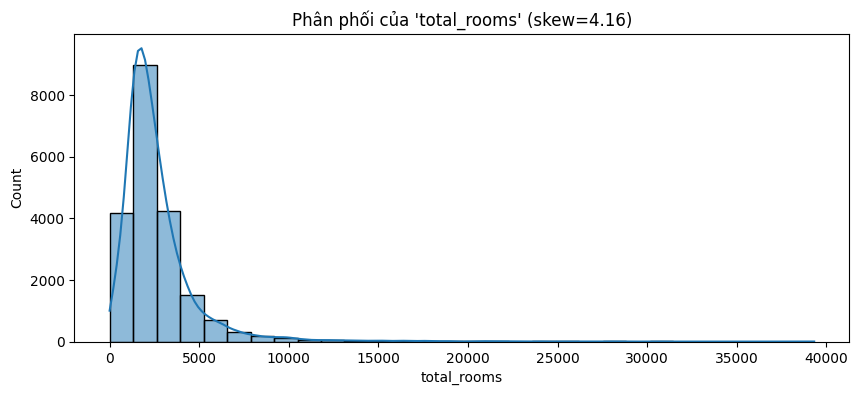


📊 Phân tích cột: households
Skewness (độ lệch): 3.414
Kurtosis (độ nhọn): 22.088
→ Lệch phải mạnh → Dùng log(x + 1) hoặc sqrt(x)


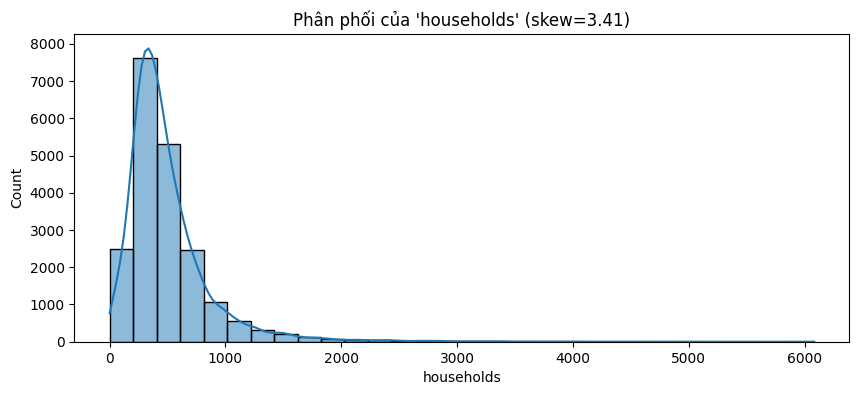


📊 Phân tích cột: median_income
Skewness (độ lệch): 1.644
Kurtosis (độ nhọn): 4.942
→ Lệch phải mạnh → Dùng log(x + 1) hoặc sqrt(x)


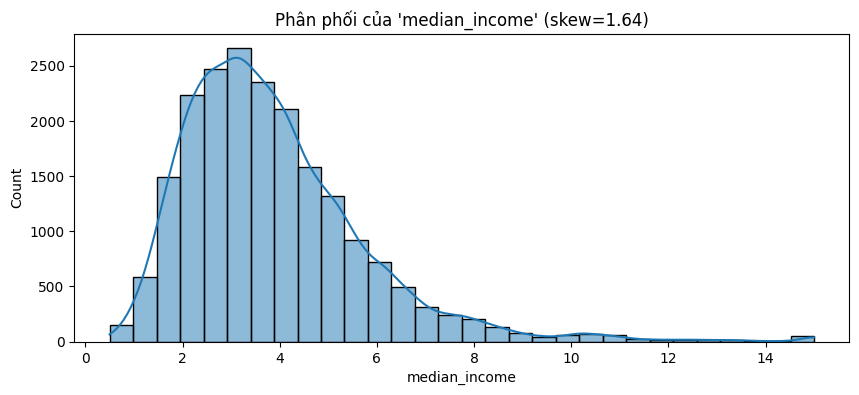


📊 Phân tích cột: total_bedrooms
Skewness (độ lệch): 3.459
Kurtosis (độ nhọn): 21.980
→ Lệch phải mạnh → Dùng log(x + 1) hoặc sqrt(x)


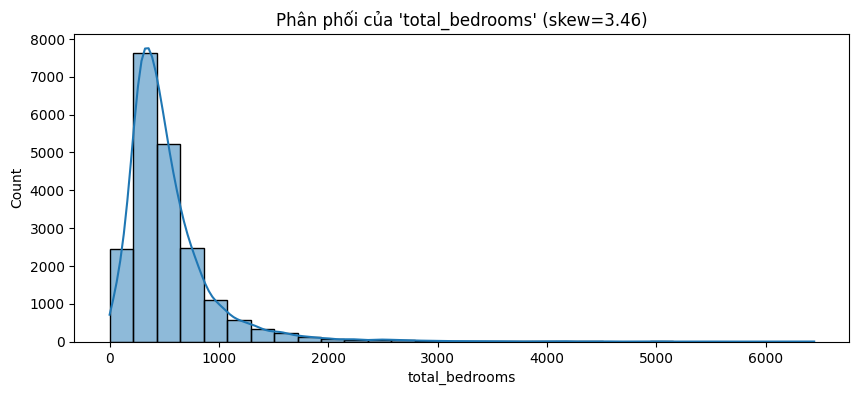


📊 Phân tích cột: population
Skewness (độ lệch): 4.960
Kurtosis (độ nhọn): 74.042
→ Lệch phải mạnh → Dùng log(x + 1) hoặc sqrt(x)


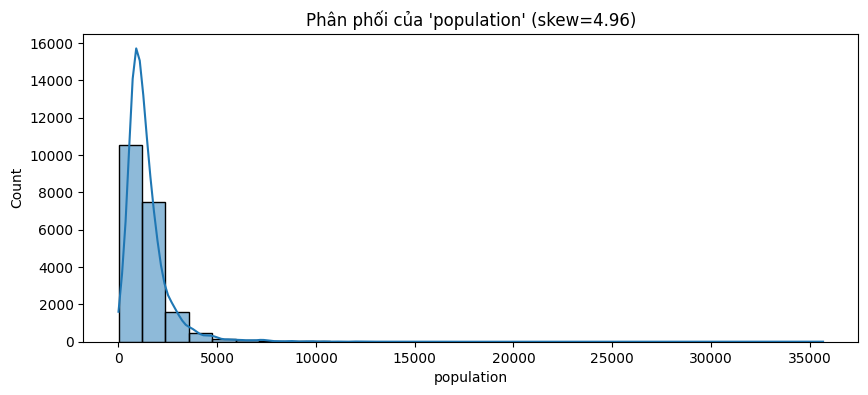


📊 Phân tích cột: median_house_value
Skewness (độ lệch): 0.978
Kurtosis (độ nhọn): 0.328
→ Lệch phải nhẹ → Dùng sqrt(x)


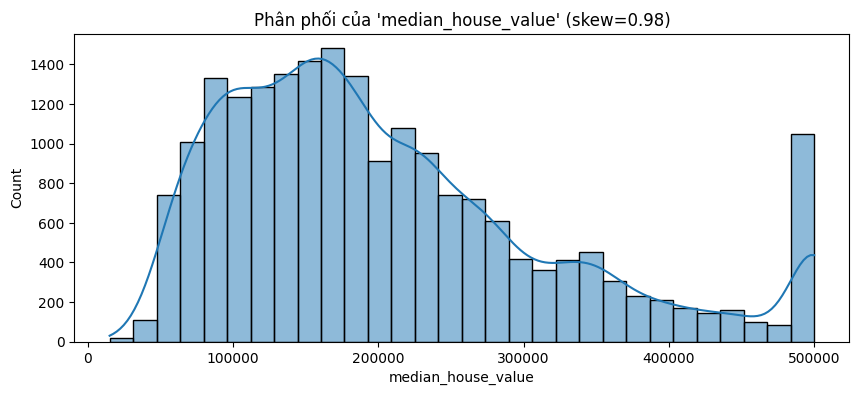


📊 Phân tích cột: total_rooms
Skewness (độ lệch): 0.464
Kurtosis (độ nhọn): 2.416
→ Phân phối gần chuẩn → Có thể giữ nguyên


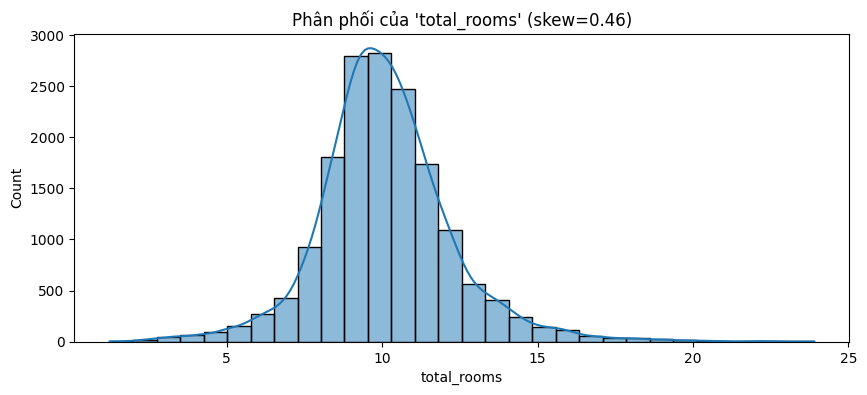


📊 Phân tích cột: households
Skewness (độ lệch): 1.112
Kurtosis (độ nhọn): 3.701
→ Lệch phải mạnh → Dùng log(x + 1) hoặc sqrt(x)


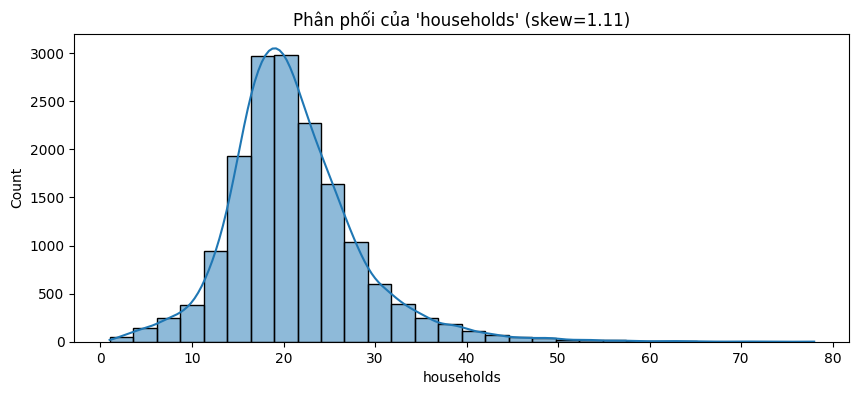


📊 Phân tích cột: median_income
Skewness (độ lệch): 0.692
Kurtosis (độ nhọn): 1.203
→ Lệch phải nhẹ → Dùng sqrt(x)


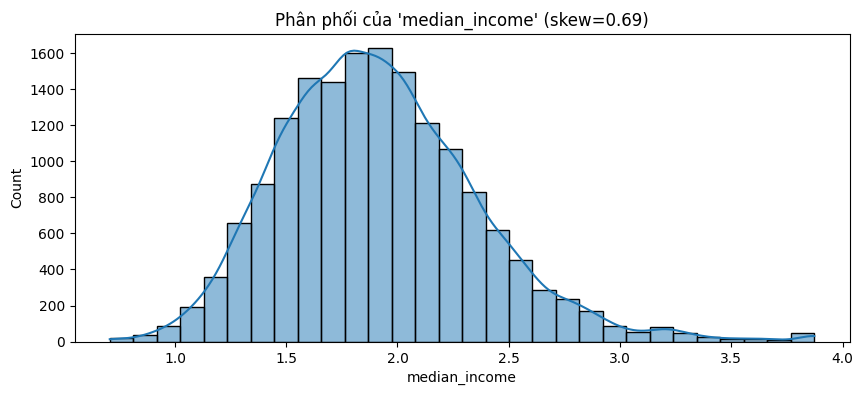


📊 Phân tích cột: total_bedrooms
Skewness (độ lệch): 0.419
Kurtosis (độ nhọn): 2.063
→ Phân phối gần chuẩn → Có thể giữ nguyên


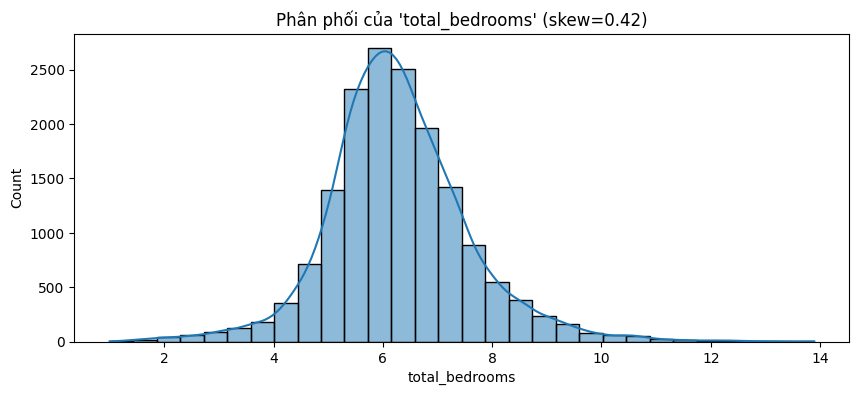


📊 Phân tích cột: population
Skewness (độ lệch): 0.383
Kurtosis (độ nhọn): 2.270
→ Phân phối gần chuẩn → Có thể giữ nguyên


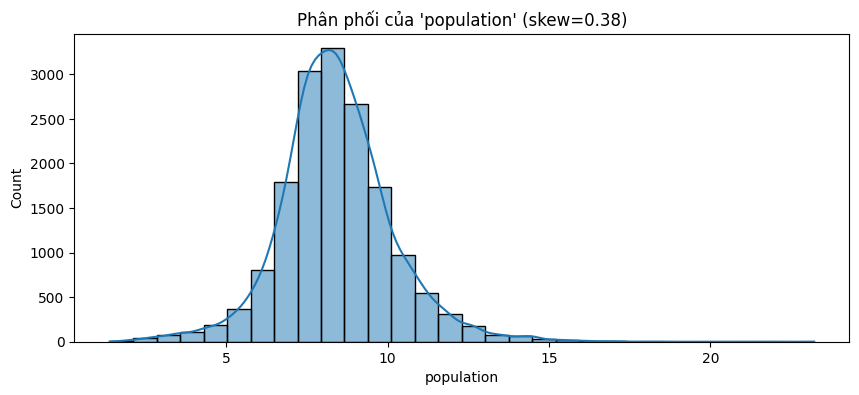

LinearRegression
  - MAE: 50767.0995
  - MSE: 4678946102.3617
  - R² Score: 0.6579
  - MAPE: 29.88%


In [ ]:
# Huấn luyện AI dự đoán giá nhà
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

# Bước 1: Tải dữ liệu
url = "https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv"
data = pd.read_csv(url)
print("Dữ liệu ban đầu:")
print(data.head())


# Bước 2: Xử lý dữ liệu
    # Xử lý Missing Value

    # Kiểm tra dữ liệu thiếu: # Số lượng giá trị thiếu theo từng cột
print(data.isnull().sum())

    # Tính phần trăm thiếu
print(data.isnull().mean() * 100)

    # # Điền trung bình
# data['total_bedrooms'].fillna(data['total_bedrooms'].median(), inplace=True)

# # Kiểm tra dữ liệu thiếu: # Số lượng giá trị thiếu theo từng cột
# print(data.isnull().sum())

data.dropna(inplace=True)

def analyze_distribution(df, column):
    x = df[column]
    skewness = skew(x)
    kurt = kurtosis(x)

    print(f"\n📊 Phân tích cột: {column}")
    print(f"Skewness (độ lệch): {skewness:.3f}")
    print(f"Kurtosis (độ nhọn): {kurt:.3f}")

    # Gợi ý biến đổi
    if skewness > 1:
        suggestion = "→ Lệch phải mạnh → Dùng log(x + 1) hoặc sqrt(x)"
    elif skewness > 0.5:
        suggestion = "→ Lệch phải nhẹ → Dùng sqrt(x)"
    elif skewness < -1:
        suggestion = "→ Lệch trái mạnh → Dùng x^2 hoặc x^3"
    elif skewness < -0.5:
        suggestion = "→ Lệch trái nhẹ → Có thể thử x^2"
    else:
        suggestion = "→ Phân phối gần chuẩn → Có thể giữ nguyên"

    print(suggestion)

    # Vẽ biểu đồ phân phối
    plt.figure(figsize=(10, 4))
    sns.histplot(x, kde=True, bins=30)
    plt.title(f"Phân phối của '{column}' (skew={skewness:.2f})")
    plt.xlabel(column)
    plt.show()

analyze_distribution(data, 'total_rooms')
analyze_distribution(data, 'households')
analyze_distribution(data, 'median_income')
analyze_distribution(data, 'total_bedrooms')
analyze_distribution(data, 'population')
analyze_distribution(data, 'median_house_value')

#  Xử lý biến phân loại (Categorical Encoding) :  Chuyển đổi cột 'ocean_proximity' sang dạng số
data = pd.get_dummies(data, columns=['ocean_proximity'], drop_first=True)


# Chia dữ liệu thành đầu vào (X) và đầu ra (y)
X = data.drop(columns=['median_house_value'])
y = data['median_house_value']

# Chuẩn hóa dữ liệu
scaler = MinMaxScaler()

# Chia thành tập train và test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dùng trên tập huấn luyện
X_train['total_rooms'] = X_train['total_rooms']**0.3

# Dùng đúng y chang trên tập kiểm tra
X_test['total_rooms'] = X_test['total_rooms']**0.3

# Dùng trên tập huấn luyện
X_train['households'] = X_train['households']**0.5

# Dùng đúng y chang trên tập kiểm tra
X_test['households'] = X_test['households']**0.5

# Dùng trên tập huấn luyện
X_train['median_income'] = X_train['median_income']**0.5

# Dùng đúng y chang trên tập kiểm tra
X_test['median_income'] = X_test['median_income']**0.5

# Dùng trên tập huấn luyện
X_train['total_bedrooms'] = X_train['total_bedrooms']**0.3

# Dùng đúng y chang trên tập kiểm tra
X_test['total_bedrooms'] = X_test['total_bedrooms']**0.3

# Dùng trên tập huấn luyện
X_train['population'] = X_train['population']**0.3

# Dùng đúng y chang trên tập kiểm tra
X_test['population'] = X_test['population']**0.3


analyze_distribution(X_train, 'total_rooms')
analyze_distribution(X_train, 'households')
analyze_distribution(X_train, 'median_income')
analyze_distribution(X_train, 'total_bedrooms')
analyze_distribution(X_train, 'population')


# Chuẩn hóa dữ liệu
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Bước 3: Huấn luyện mô hình
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Bước 4: Đánh giá mô hình
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)

    #Sai số trung bình tuyệt đối
    mae = mean_absolute_error(y_test, y_pred)

    # Sai số bình phương trung bình
    mse = mean_squared_error(y_test, y_pred)

    # Sai số phần trăm trung bình tuyệt đối
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

   # Độ chính xác theo R2
    r2 = r2_score(y_test, y_pred)

    print(f"{model.__class__.__name__}")
    print(f"  - MAE: {mae:.4f}")
    print(f"  - MSE: {mse:.4f}")
    print(f"  - R² Score: {r2:.4f}")
    print(f"  - MAPE: {mape:.2f}%")  # Tính sai số phần trăm

evaluate_model(lr_model, X_test, y_test)




BỘ CODE FULL: ĐỘ CHÍNH XÁC 66.86%!
ĐÃ ÁP DỤNG FEATURE ENGINEERING NHƯNG CHƯA CẢI THIỆN NHIỀU


📂 Dữ liệu ban đầu:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  

🔍 Missing values:
longitude               0
latitude   

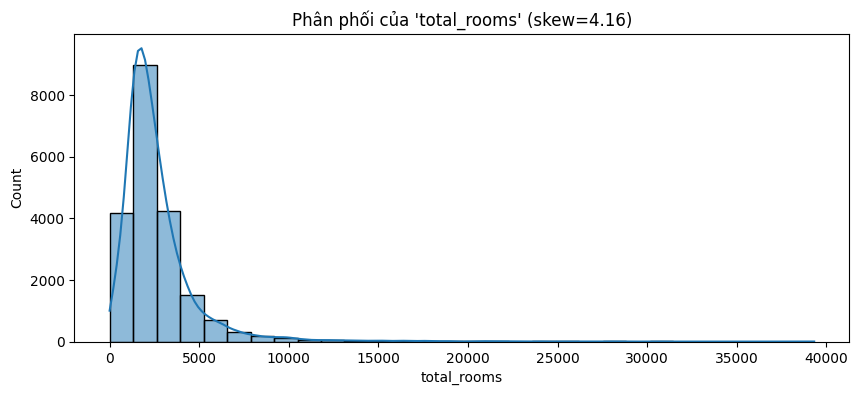


📊 Phân tích cột: households
Skewness (độ lệch): 3.414
Kurtosis (độ nhọn): 22.088
→ Lệch phải mạnh → Dùng log(x + 1) hoặc sqrt(x)


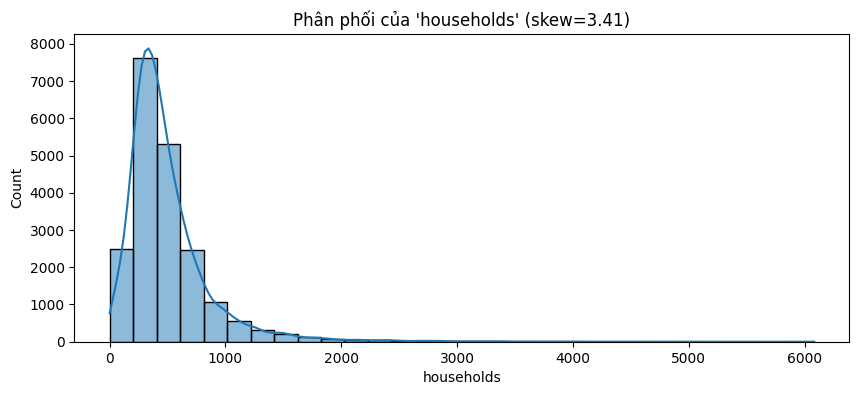


📊 Phân tích cột: median_income
Skewness (độ lệch): 1.644
Kurtosis (độ nhọn): 4.942
→ Lệch phải mạnh → Dùng log(x + 1) hoặc sqrt(x)


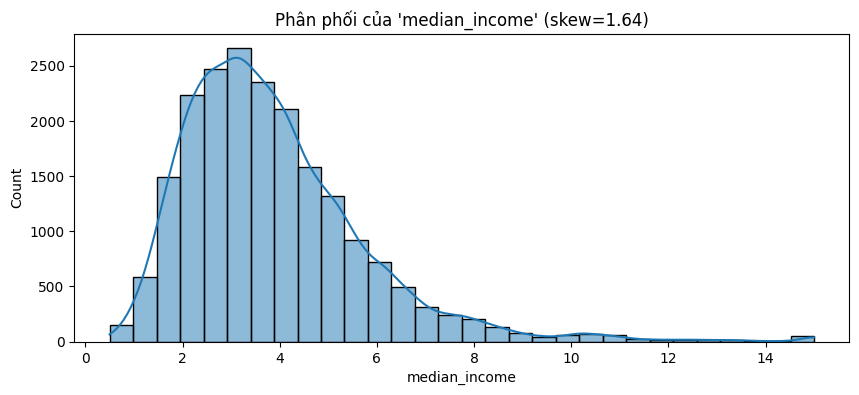


📊 Phân tích cột: total_bedrooms
Skewness (độ lệch): 3.459
Kurtosis (độ nhọn): 21.980
→ Lệch phải mạnh → Dùng log(x + 1) hoặc sqrt(x)


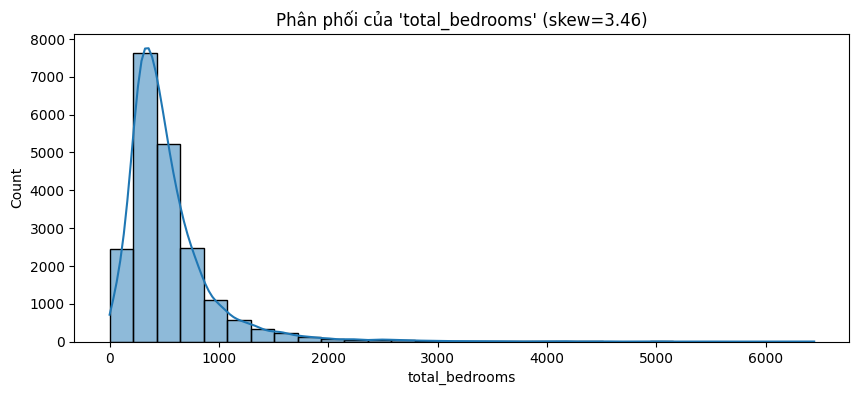


📊 Phân tích cột: population
Skewness (độ lệch): 4.960
Kurtosis (độ nhọn): 74.042
→ Lệch phải mạnh → Dùng log(x + 1) hoặc sqrt(x)


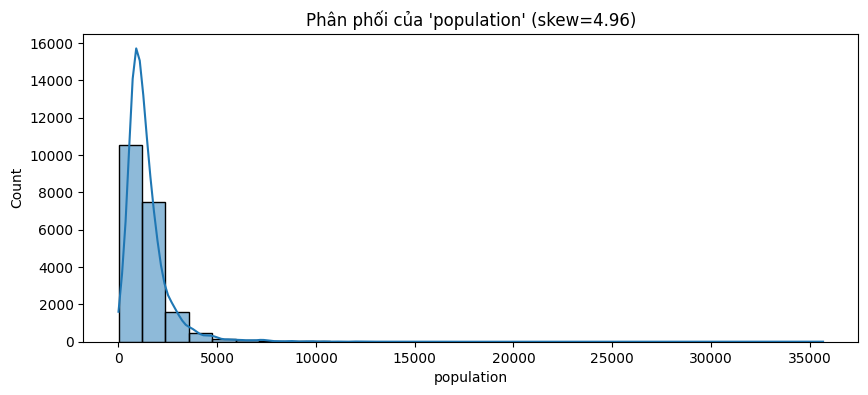


📊 Phân tích cột: median_house_value
Skewness (độ lệch): 0.978
Kurtosis (độ nhọn): 0.328
→ Lệch phải nhẹ → Dùng sqrt(x)


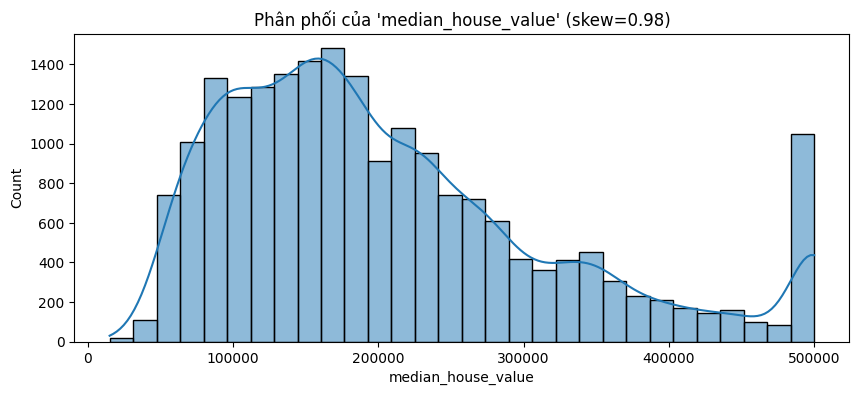


📊 Phân tích cột: total_rooms
Skewness (độ lệch): 0.464
Kurtosis (độ nhọn): 2.416
→ Phân phối gần chuẩn → Có thể giữ nguyên


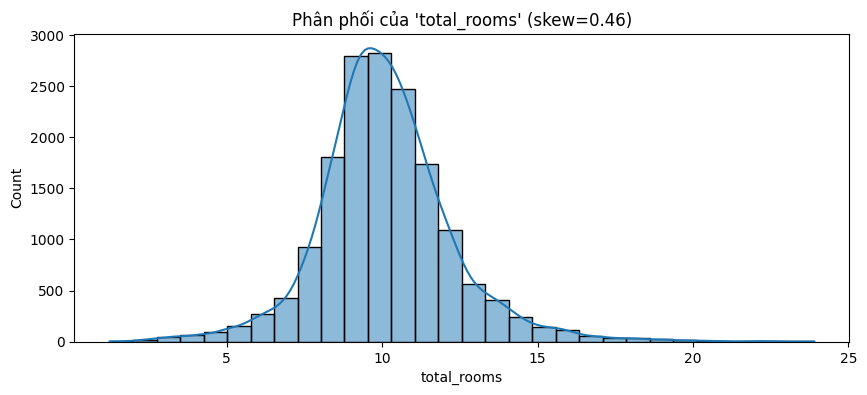


📊 Phân tích cột: households
Skewness (độ lệch): 1.112
Kurtosis (độ nhọn): 3.701
→ Lệch phải mạnh → Dùng log(x + 1) hoặc sqrt(x)


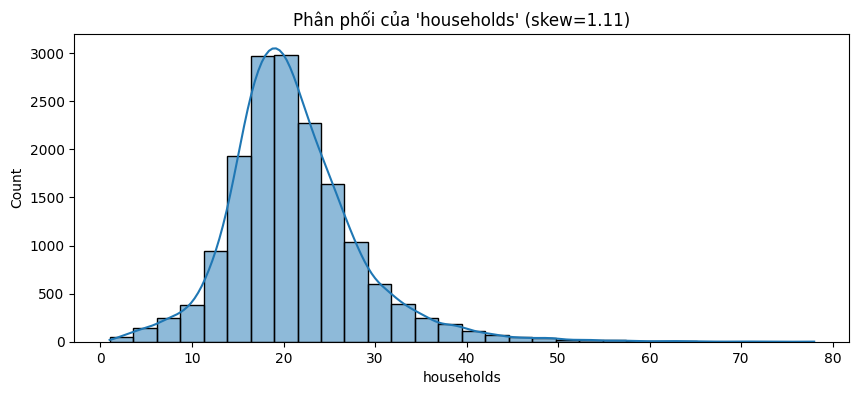


📊 Phân tích cột: median_income
Skewness (độ lệch): 0.692
Kurtosis (độ nhọn): 1.203
→ Lệch phải nhẹ → Dùng sqrt(x)


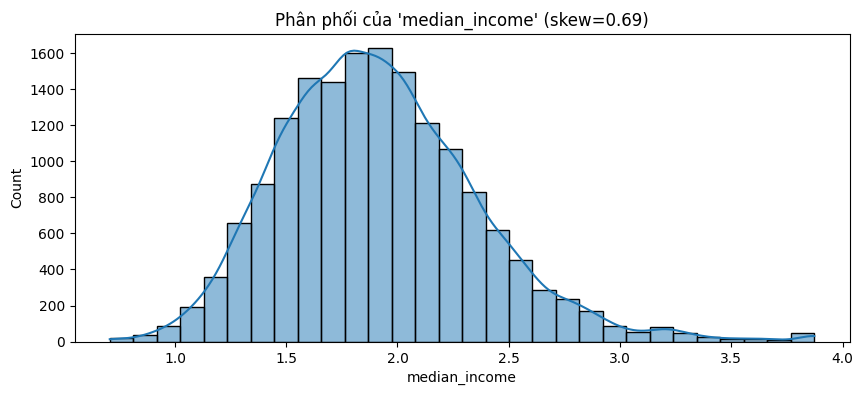


📊 Phân tích cột: total_bedrooms
Skewness (độ lệch): 0.419
Kurtosis (độ nhọn): 2.063
→ Phân phối gần chuẩn → Có thể giữ nguyên


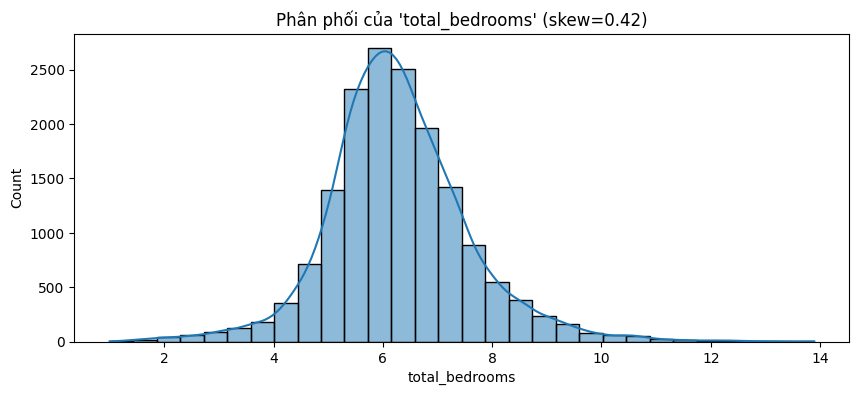


📊 Phân tích cột: population
Skewness (độ lệch): 0.383
Kurtosis (độ nhọn): 2.270
→ Phân phối gần chuẩn → Có thể giữ nguyên


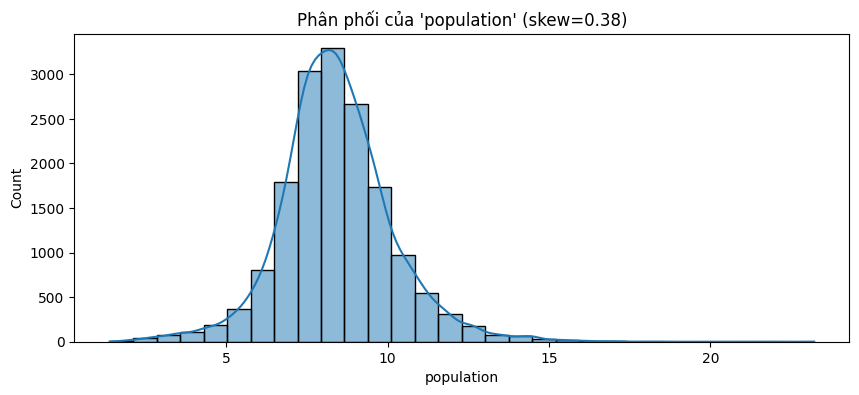

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


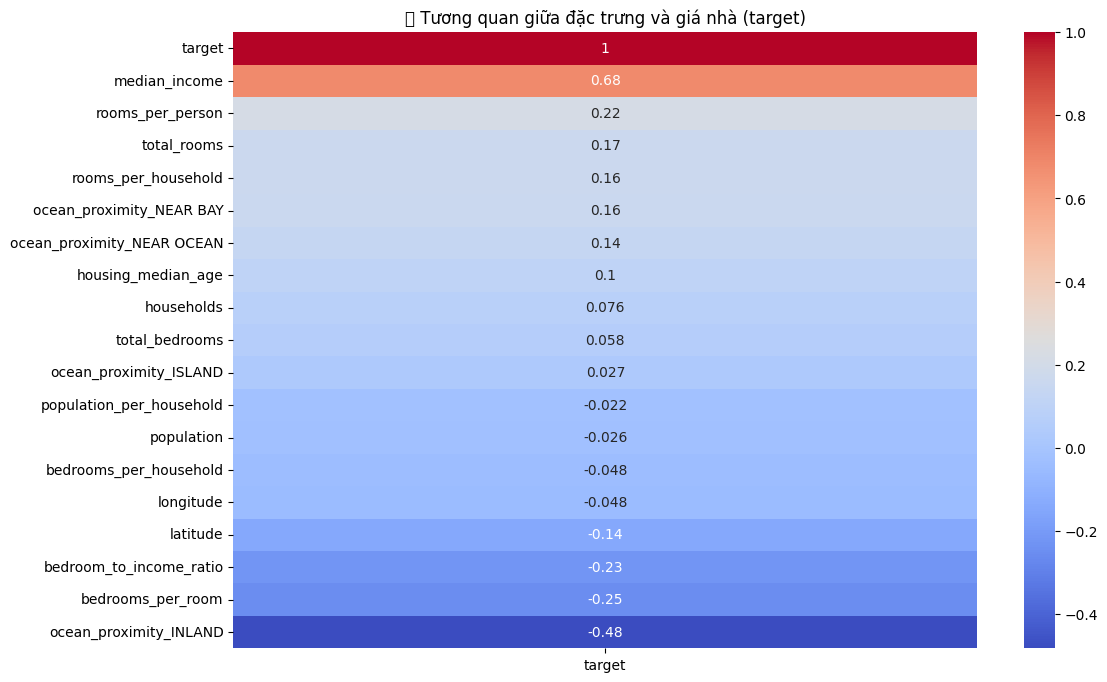

Train R²: 0.6725809144184076

📈 Đánh giá mô hình LinearRegression:
  - MAE:  49353.1009
  - MSE:  4531976684.4301
  - R²:   0.6686
  - MAPE: 29.21%


In [ ]:
# Code Full
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

# ================================
# Bước 1: Tải dữ liệu
# ================================
url = "https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv"
data = pd.read_csv(url)
print("📂 Dữ liệu ban đầu:")
print(data.head())

# ================================
# Bước 2: Xử lý dữ liệu
# ================================

# Kiểm tra missing values
print("\n🔍 Missing values:")
print(data.isnull().sum())
print(data.isnull().mean() * 100)

# Loại bỏ dòng có giá trị thiếu
data.dropna(inplace=True)

# Hàm phân tích phân phối
def analyze_distribution(df, column):
    x = df[column]
    skewness = skew(x)
    kurt = kurtosis(x)

    print(f"\n📊 Phân tích cột: {column}")
    print(f"Skewness (độ lệch): {skewness:.3f}")
    print(f"Kurtosis (độ nhọn): {kurt:.3f}")

    # Gợi ý biến đổi
    if skewness > 1:
        suggestion = "→ Lệch phải mạnh → Dùng log(x + 1) hoặc sqrt(x)"
    elif skewness > 0.5:
        suggestion = "→ Lệch phải nhẹ → Dùng sqrt(x)"
    elif skewness < -1:
        suggestion = "→ Lệch trái mạnh → Dùng x^2 hoặc x^3"
    elif skewness < -0.5:
        suggestion = "→ Lệch trái nhẹ → Có thể thử x^2"
    else:
        suggestion = "→ Phân phối gần chuẩn → Có thể giữ nguyên"

    print(suggestion)

    plt.figure(figsize=(10, 4))
    sns.histplot(x, kde=True, bins=30)
    plt.title(f"Phân phối của '{column}' (skew={skewness:.2f})")
    plt.xlabel(column)
    plt.show()

# Phân tích một số cột trước xử lý
columns_to_analyze = ['total_rooms', 'households', 'median_income', 'total_bedrooms', 'population', 'median_house_value']
for col in columns_to_analyze:
    analyze_distribution(data, col)

# One-hot encoding cho biến phân loại
data = pd.get_dummies(data, columns=['ocean_proximity'], drop_first=True)

# Thêm đặc trưng dữ liệu
data['rooms_per_household'] = data['total_rooms'] /data['households']
data['bedrooms_per_room'] = data['total_bedrooms'] / data['total_rooms']
data['population_per_household'] = data['population'] / data['households']
data['rooms_per_person'] = data['total_rooms'] / data['population']
data['bedrooms_per_household'] = data['total_bedrooms'] / data['households']
data['bedroom_to_income_ratio'] = data['total_bedrooms'] / data['median_income']

#X = dat·['total_rooms', 'households', 'median_income', 'total_bedrooms', 'population', 'median_house_value']

# Tách dữ liệu đầu vào và đầu ra
X = data.drop(columns=['median_house_value'])
y = data['median_house_value']

# Chia thành tập train và test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Biến đổi một số cột để làm giảm skewness
transformations = {
    'total_rooms': 0.3,
    'households': 0.5,
    'median_income': 0.5,
    'total_bedrooms': 0.3,
    'population': 0.3
}

for col, power in transformations.items():
    X_train[col] = X_train[col] ** power
    X_test[col] = X_test[col] ** power

# Phân tích lại sau khi biến đổi
for col in transformations:
    analyze_distribution(X_train, col)

# Chuẩn hóa dữ liệu
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Ghép lại X_train + y_train để tính tương quan
train_df = pd.DataFrame(X_train, columns=X.columns)
train_df['target'] = y_train.values

# Ma trận tương quan
corr_matrix = train_df.corr()

# Vẽ heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix[['target']].sort_values('target', ascending=False), annot=True, cmap='coolwarm')
plt.title("🔍 Tương quan giữa đặc trưng và giá nhà (target)")
plt.show()

# ================================
# Bước 3: Huấn luyện mô hình
# ================================
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# ================================
# Bước 4: Đánh giá mô hình
# ================================
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    r2 = r2_score(y_test, y_pred)

    print(f"\n📈 Đánh giá mô hình {model.__class__.__name__}:")
    print(f"  - MAE:  {mae:.4f}")
    print(f"  - MSE:  {mse:.4f}")
    print(f"  - R²:   {r2:.4f}")
    print(f"  - MAPE: {mape:.2f}%")

print("Train R²:", lr_model.score(X_train, y_train))

evaluate_model(lr_model, X_test, y_test)


In [ ]:
# Code tay
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ================================
# Bước 1: Tải và xử lý dữ liệu
# ================================
url = "https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv"
data = pd.read_csv(url)
data.dropna(inplace=True)

# One-hot encoding đơn giản
data = pd.get_dummies(data, columns=['ocean_proximity'], drop_first=True)

# Tạo đặc trưng mới
data['rooms_per_household'] = data['total_rooms'] / data['households']
data['bedrooms_per_room'] = data['total_bedrooms'] / data['total_rooms']
data['population_per_household'] = data['population'] / data['households']

# Tách input/output
y = data['median_house_value'].values.reshape(-1, 1)
X = data.drop(columns=['median_house_value'])

# Biến đổi phi tuyến thủ công
transformations = {
    'total_rooms': 0.3,
    'households': 0.5,
    'median_income': 0.5,
    'total_bedrooms': 0.3,
    'population': 0.3
}
for col, power in transformations.items():
    X[col] = X[col] ** power

# ================================
# Bước 2: Chia tập train/test thủ công
# ================================
np.random.seed(42)
indices = np.random.permutation(len(X))
train_size = int(len(X) * 0.8)

train_idx, test_idx = indices[:train_size], indices[train_size:]
X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
y_train, y_test = y[train_idx], y[test_idx]

# ================================
# Bước 3: Chuẩn hóa thủ công (Min-Max)
# ================================
X_min = X_train.min()
X_max = X_train.max()

X_train_norm = (X_train - X_min) / (X_max - X_min)
X_test_norm = (X_test - X_min) / (X_max - X_min)

# ================================
# Bước 4: Huấn luyện Linear Regression tay
# ================================

# Thay bộ code ngày 1

# ================================
# Bước 5: Dự đoán & Đánh giá
# ================================
def evaluate(y_true, y_pred):
    mae = np.mean(np.abs(y_true - y_pred))
    mse = np.mean((y_true - y_pred) ** 2)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return mae, mse, mape, r2

# Dự đoán


# Đánh giá
mae, mse, mape, r2 = evaluate(y_test, y_pred_test)
r2_train, *_ = evaluate(y_train, y_pred_train)

# In kết quả
print(f"\n📈 Đánh giá mô hình Linear Regression (code tay):")
print(f"Train R²: {r2_train:.4f}")
print(f"Test R²:  {r2:.4f}")
print(f"MAE:      {mae:.2f}")
print(f"MSE:      {mse:.2f}")
print(f"MAPE:     {mape:.2f}%")


Dữ liệu ban đầu:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
longitude               0
latitude                0
housin

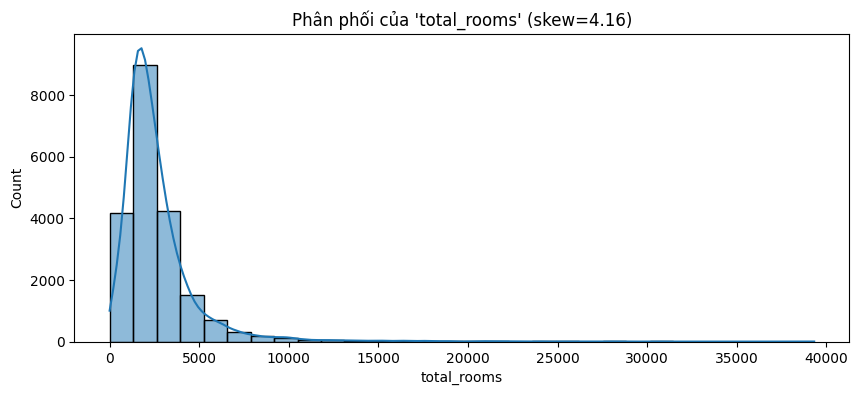


📊 Phân tích cột: households
Skewness (độ lệch): 3.414
Kurtosis (độ nhọn): 22.088
→ Lệch phải mạnh → Dùng log(x + 1) hoặc sqrt(x)


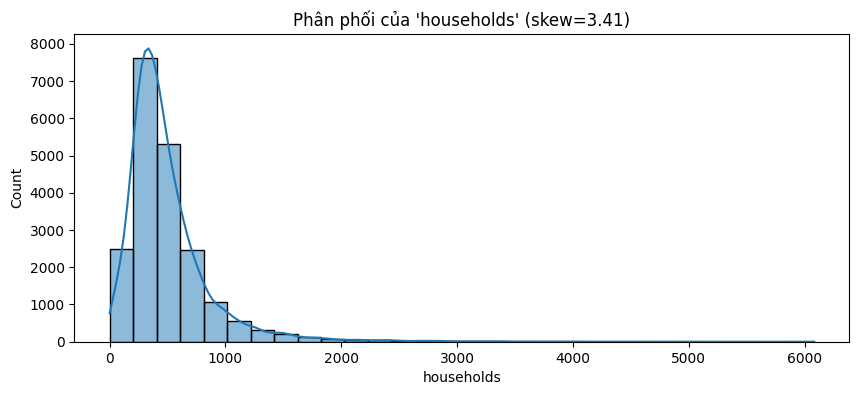


📊 Phân tích cột: median_income
Skewness (độ lệch): 1.644
Kurtosis (độ nhọn): 4.942
→ Lệch phải mạnh → Dùng log(x + 1) hoặc sqrt(x)


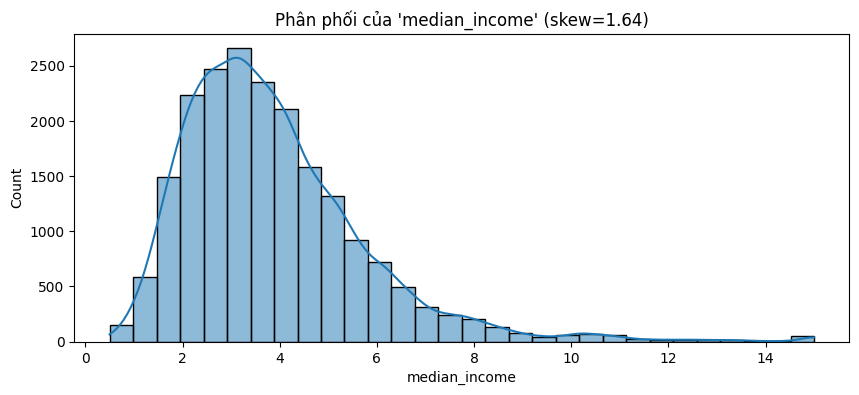


📊 Phân tích cột: total_bedrooms
Skewness (độ lệch): 3.459
Kurtosis (độ nhọn): 21.980
→ Lệch phải mạnh → Dùng log(x + 1) hoặc sqrt(x)


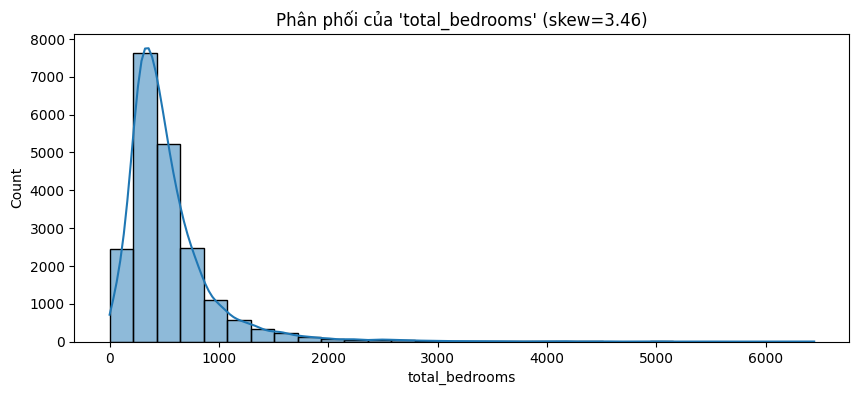


📊 Phân tích cột: population
Skewness (độ lệch): 4.960
Kurtosis (độ nhọn): 74.042
→ Lệch phải mạnh → Dùng log(x + 1) hoặc sqrt(x)


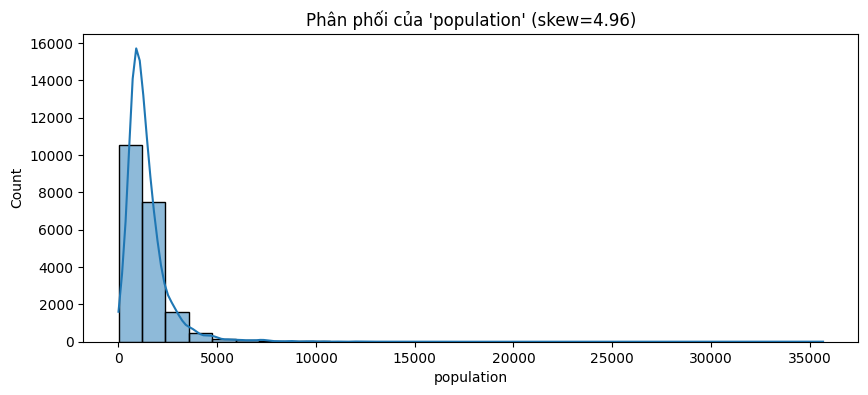


📊 Phân tích cột: median_house_value
Skewness (độ lệch): 0.978
Kurtosis (độ nhọn): 0.328
→ Lệch phải nhẹ → Dùng sqrt(x)


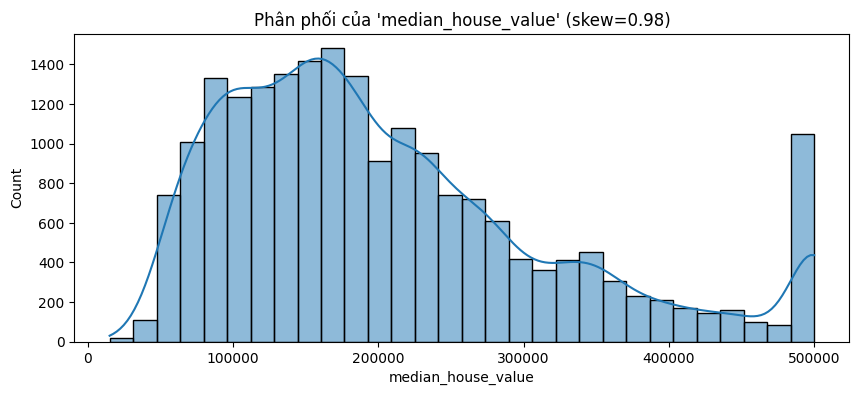


📊 Phân tích cột: total_rooms
Skewness (độ lệch): 0.464
Kurtosis (độ nhọn): 2.416
→ Phân phối gần chuẩn → Có thể giữ nguyên


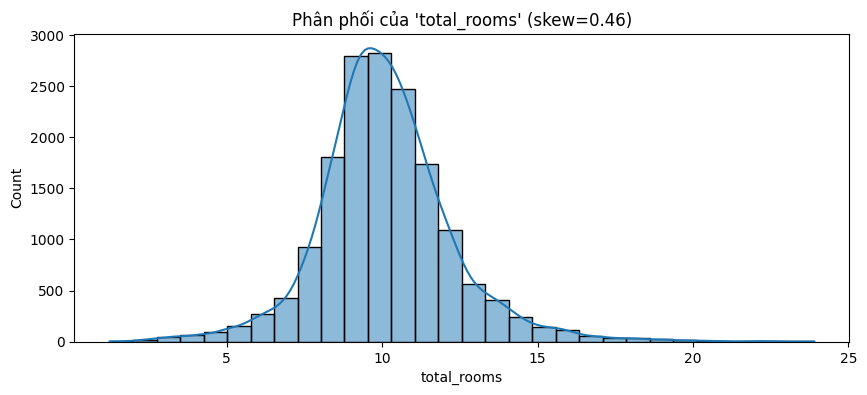


📊 Phân tích cột: households
Skewness (độ lệch): 1.112
Kurtosis (độ nhọn): 3.701
→ Lệch phải mạnh → Dùng log(x + 1) hoặc sqrt(x)


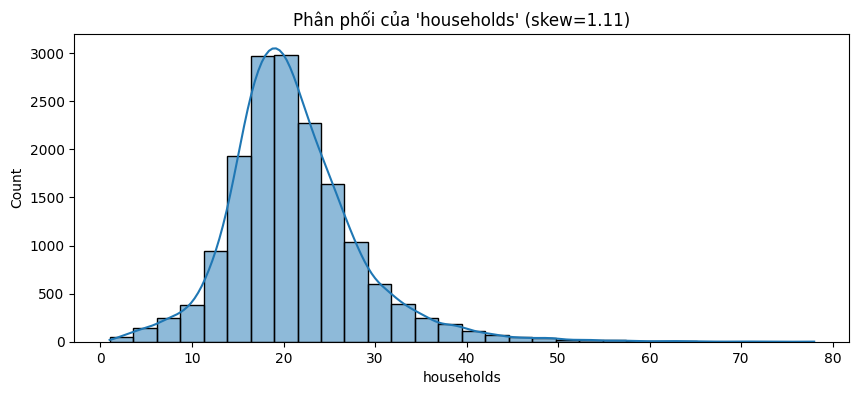


📊 Phân tích cột: median_income
Skewness (độ lệch): 0.692
Kurtosis (độ nhọn): 1.203
→ Lệch phải nhẹ → Dùng sqrt(x)


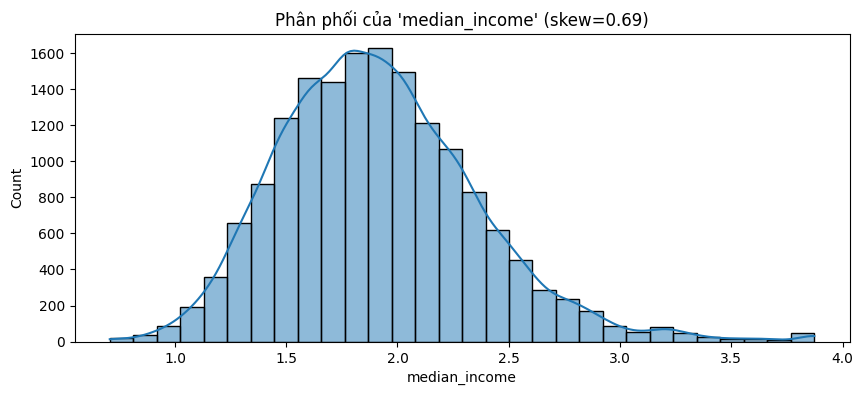


📊 Phân tích cột: total_bedrooms
Skewness (độ lệch): 0.419
Kurtosis (độ nhọn): 2.063
→ Phân phối gần chuẩn → Có thể giữ nguyên


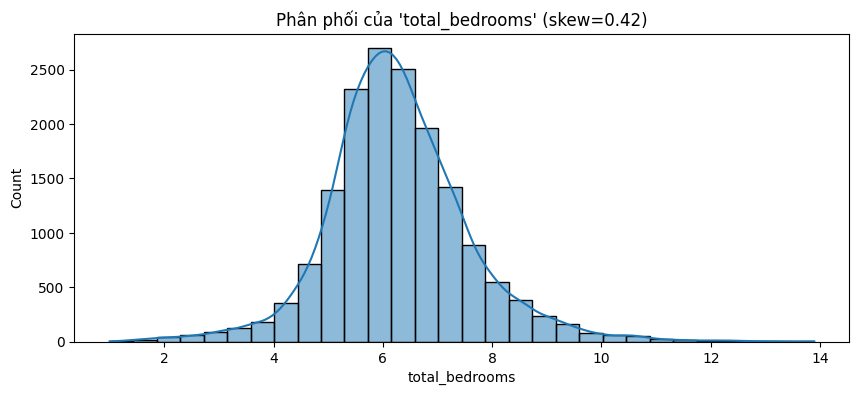


📊 Phân tích cột: population
Skewness (độ lệch): 0.383
Kurtosis (độ nhọn): 2.270
→ Phân phối gần chuẩn → Có thể giữ nguyên


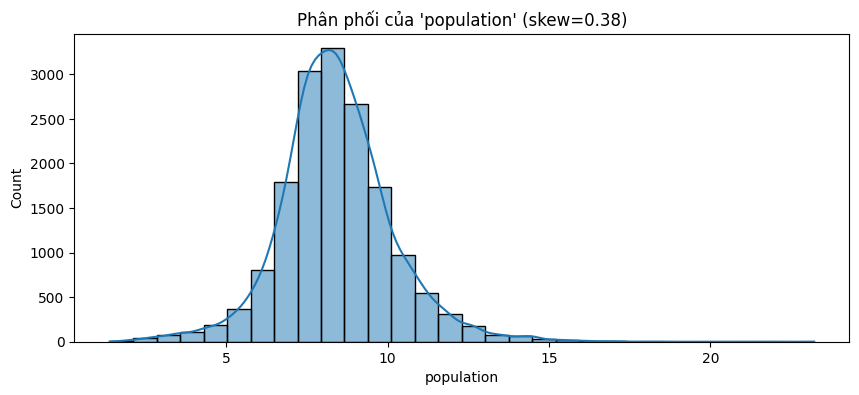

LinearRegression - MAE: 49353.100876486606, MSE: 4531976684.430129
  - R² Score: 0.6686
  - MAPE: 29.21%
RandomForestRegressor - MAE: 32660.48505260582, MSE: 2527569857.996834
  - R² Score: 0.8152
  - MAPE: 18.02%


In [ ]:
# Huấn luyện AI dự đoán giá nhà
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
from sklearn.ensemble import RandomForestRegressor

# Bước 1: Tải dữ liệu
url = "https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv"
data = pd.read_csv(url)
print("Dữ liệu ban đầu:")
print(data.head())


# Bước 2: Xử lý dữ liệu
    # Xử lý Missing Value

    # Kiểm tra dữ liệu thiếu: # Số lượng giá trị thiếu theo từng cột
print(data.isnull().sum())

    # Tính phần trăm thiếu
print(data.isnull().mean() * 100)

    # # Điền trung bình
# data['total_bedrooms'].fillna(data['total_bedrooms'].median(), inplace=True)

# # Kiểm tra dữ liệu thiếu: # Số lượng giá trị thiếu theo từng cột
# print(data.isnull().sum())

data.dropna(inplace=True)

def analyze_distribution(df, column):
    x = df[column]
    skewness = skew(x)
    kurt = kurtosis(x)

    print(f"\n📊 Phân tích cột: {column}")
    print(f"Skewness (độ lệch): {skewness:.3f}")
    print(f"Kurtosis (độ nhọn): {kurt:.3f}")

    # Gợi ý biến đổi
    if skewness > 1:
        suggestion = "→ Lệch phải mạnh → Dùng log(x + 1) hoặc sqrt(x)"
    elif skewness > 0.5:
        suggestion = "→ Lệch phải nhẹ → Dùng sqrt(x)"
    elif skewness < -1:
        suggestion = "→ Lệch trái mạnh → Dùng x^2 hoặc x^3"
    elif skewness < -0.5:
        suggestion = "→ Lệch trái nhẹ → Có thể thử x^2"
    else:
        suggestion = "→ Phân phối gần chuẩn → Có thể giữ nguyên"

    print(suggestion)

    # Vẽ biểu đồ phân phối
    plt.figure(figsize=(10, 4))
    sns.histplot(x, kde=True, bins=30)
    plt.title(f"Phân phối của '{column}' (skew={skewness:.2f})")
    plt.xlabel(column)
    plt.show()

analyze_distribution(data, 'total_rooms')
analyze_distribution(data, 'households')
analyze_distribution(data, 'median_income')
analyze_distribution(data, 'total_bedrooms')
analyze_distribution(data, 'population')
analyze_distribution(data, 'median_house_value')

#  Xử lý biến phân loại (Categorical Encoding) :  Chuyển đổi cột 'ocean_proximity' sang dạng số
data = pd.get_dummies(data, columns=['ocean_proximity'], drop_first=True)

# Thêm đặc trưng dữ liệu
data['rooms_per_household'] = data['total_rooms'] /data['households']
data['bedrooms_per_room'] = data['total_bedrooms'] / data['total_rooms']
data['population_per_household'] = data['population'] / data['households']
data['rooms_per_person'] = data['total_rooms'] / data['population']
data['bedrooms_per_household'] = data['total_bedrooms'] / data['households']
data['bedroom_to_income_ratio'] = data['total_bedrooms'] / data['median_income']

# Chia dữ liệu thành đầu vào (X) và đầu ra (y)
X = data.drop(columns=['median_house_value'])
y = data['median_house_value']

# Chuẩn hóa dữ liệu
scaler = MinMaxScaler()

# Chia thành tập train và test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dùng trên tập huấn luyện
X_train['total_rooms'] = X_train['total_rooms']**0.3

# Dùng đúng y chang trên tập kiểm tra
X_test['total_rooms'] = X_test['total_rooms']**0.3

# Dùng trên tập huấn luyện
X_train['households'] = X_train['households']**0.5

# Dùng đúng y chang trên tập kiểm tra
X_test['households'] = X_test['households']**0.5

# Dùng trên tập huấn luyện
X_train['median_income'] = X_train['median_income']**0.5

# Dùng đúng y chang trên tập kiểm tra
X_test['median_income'] = X_test['median_income']**0.5

# Dùng trên tập huấn luyện
X_train['total_bedrooms'] = X_train['total_bedrooms']**0.3

# Dùng đúng y chang trên tập kiểm tra
X_test['total_bedrooms'] = X_test['total_bedrooms']**0.3

# Dùng trên tập huấn luyện
X_train['population'] = X_train['population']**0.3

# Dùng đúng y chang trên tập kiểm tra
X_test['population'] = X_test['population']**0.3


analyze_distribution(X_train, 'total_rooms')
analyze_distribution(X_train, 'households')
analyze_distribution(X_train, 'median_income')
analyze_distribution(X_train, 'total_bedrooms')
analyze_distribution(X_train, 'population')


# Chuẩn hóa dữ liệu
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Bước 3: Huấn luyện mô hình
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Bước 4: Đánh giá mô hình
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)

    #Sai số trung bình tuyệt đối
    mae = mean_absolute_error(y_test, y_pred)

    # Sai số bình phương trung bình
    mse = mean_squared_error(y_test, y_pred)

    # Sai số phần trăm trung bình tuyệt đối
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

   # Độ chính xác theo R2
    r2 = r2_score(y_test, y_pred)

    print(f"{model.__class__.__name__} - MAE: {mae}, MSE: {mse}")
    print(f"  - R² Score: {r2:.4f}")
    print(f"  - MAPE: {mape:.2f}%")  # Tính sai số phần trăm

evaluate_model(lr_model, X_test, y_test)
evaluate_model(rf_model, X_test, y_test)



📂 Dữ liệu ban đầu:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  

🔍 Missing values:
longitude               0
latitude   

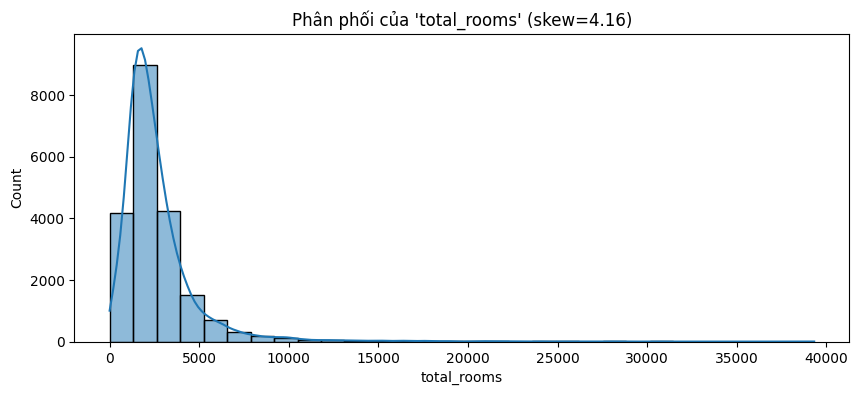


📊 Phân tích cột: households
Skewness (độ lệch): 3.414
Kurtosis (độ nhọn): 22.088
→ Lệch phải mạnh → Dùng log(x + 1) hoặc sqrt(x)


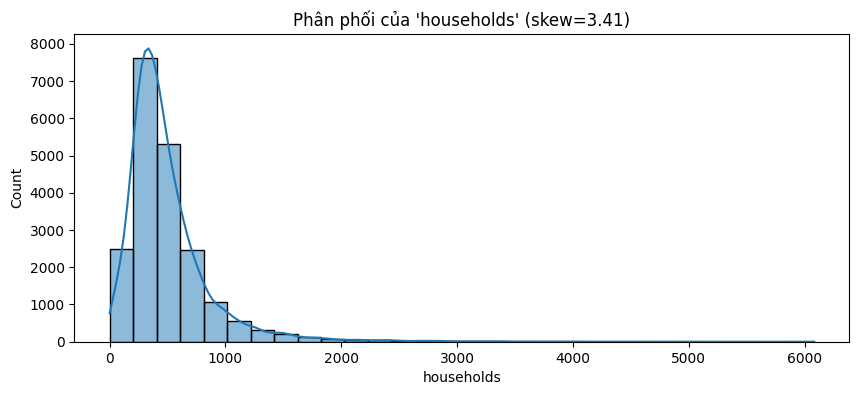


📊 Phân tích cột: median_income
Skewness (độ lệch): 1.644
Kurtosis (độ nhọn): 4.942
→ Lệch phải mạnh → Dùng log(x + 1) hoặc sqrt(x)


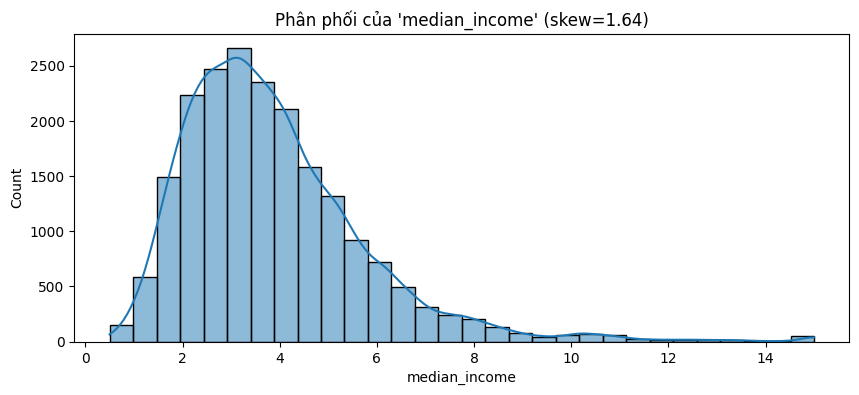


📊 Phân tích cột: total_bedrooms
Skewness (độ lệch): 3.459
Kurtosis (độ nhọn): 21.980
→ Lệch phải mạnh → Dùng log(x + 1) hoặc sqrt(x)


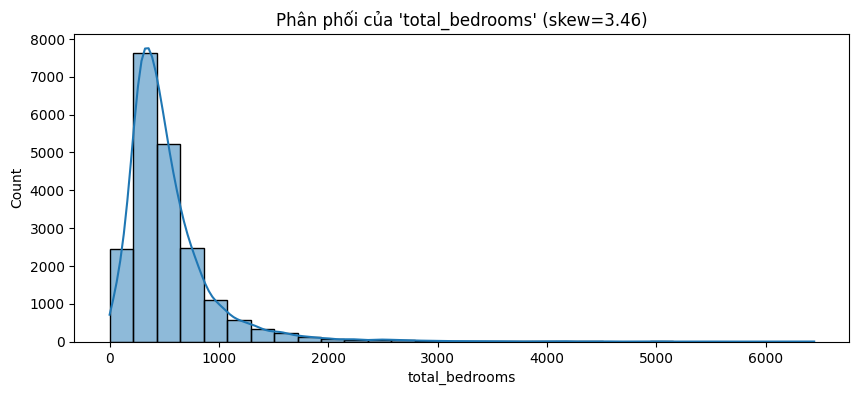


📊 Phân tích cột: population
Skewness (độ lệch): 4.960
Kurtosis (độ nhọn): 74.042
→ Lệch phải mạnh → Dùng log(x + 1) hoặc sqrt(x)


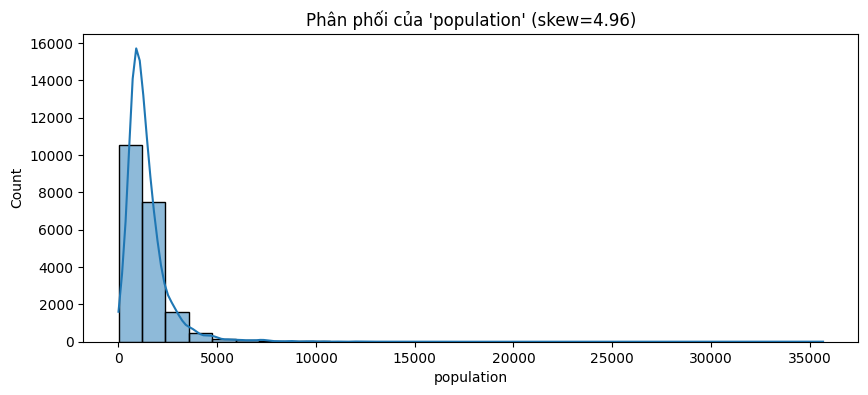


📊 Phân tích cột: median_house_value
Skewness (độ lệch): 0.978
Kurtosis (độ nhọn): 0.328
→ Lệch phải nhẹ → Dùng sqrt(x)


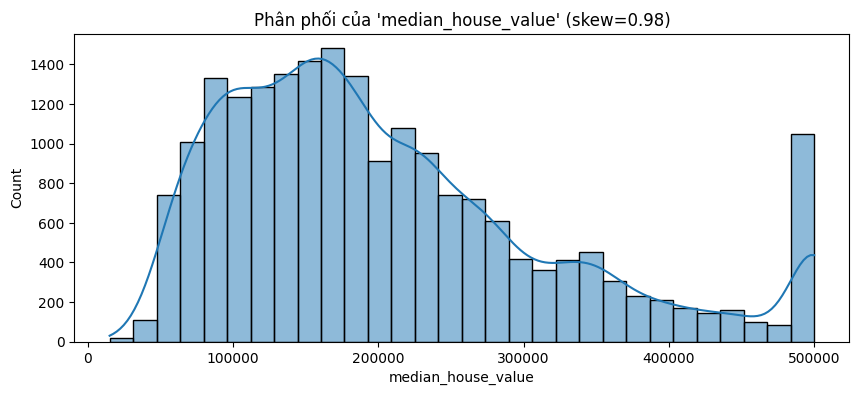


📊 Phân tích cột: total_rooms
Skewness (độ lệch): 0.464
Kurtosis (độ nhọn): 2.416
→ Phân phối gần chuẩn → Có thể giữ nguyên


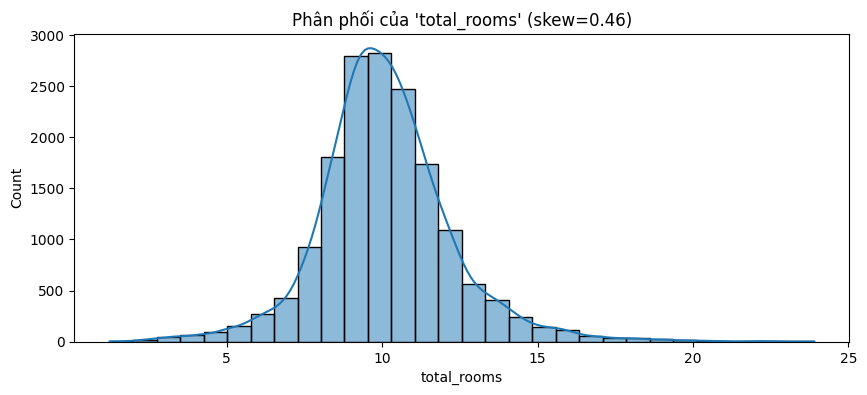


📊 Phân tích cột: households
Skewness (độ lệch): 1.112
Kurtosis (độ nhọn): 3.701
→ Lệch phải mạnh → Dùng log(x + 1) hoặc sqrt(x)


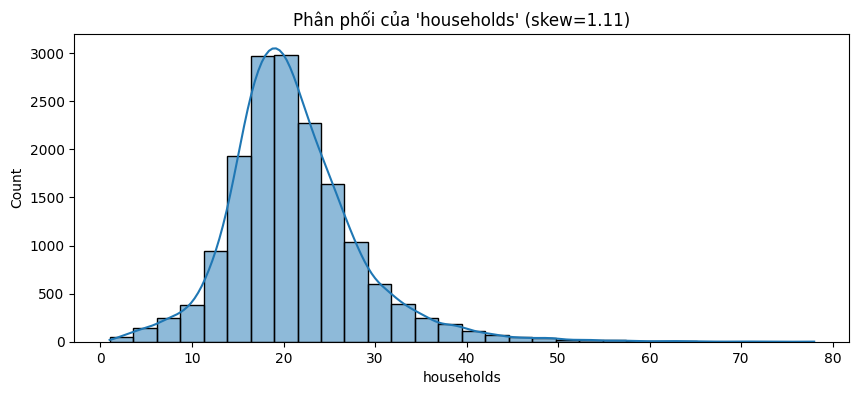


📊 Phân tích cột: median_income
Skewness (độ lệch): 0.692
Kurtosis (độ nhọn): 1.203
→ Lệch phải nhẹ → Dùng sqrt(x)


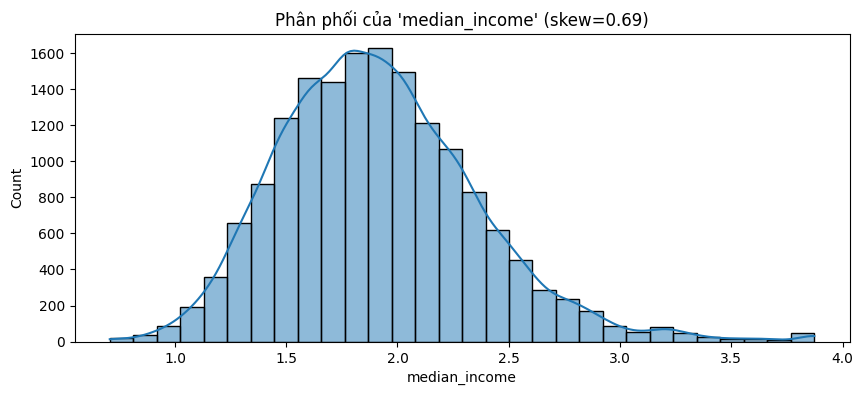


📊 Phân tích cột: total_bedrooms
Skewness (độ lệch): 0.419
Kurtosis (độ nhọn): 2.063
→ Phân phối gần chuẩn → Có thể giữ nguyên


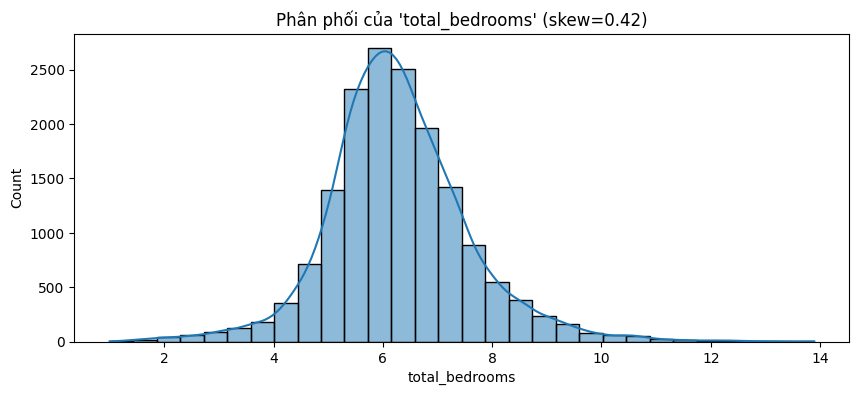

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


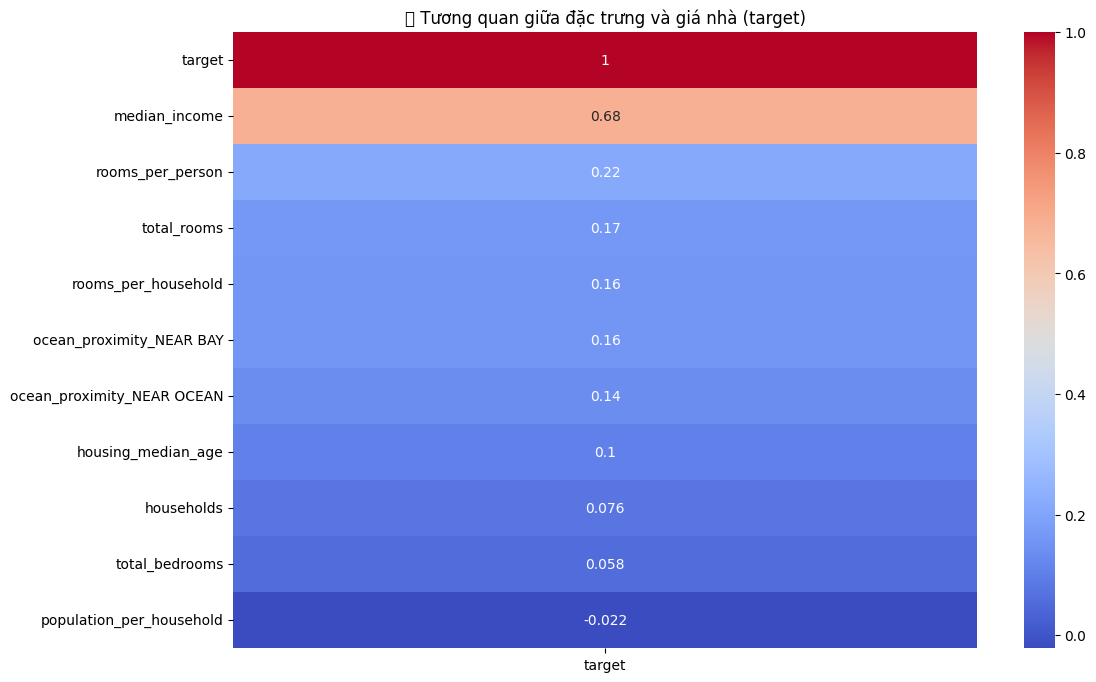

Train R²: 0.6023385101154168

📈 Đánh giá mô hình LinearRegression:
  - MAE:  54125.6898
  - MSE:  5314217967.8018
  - R²:   0.6114
  - MAPE: 32.40%


In [ ]:
# Áp dụng chọn lọc đặc trưng
# Nhưng chưa hiệu quả
#=================================
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

# ================================
# Bước 1: Tải dữ liệu
# ================================
url = "https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv"
data = pd.read_csv(url)
print("📂 Dữ liệu ban đầu:")
print(data.head())

# ================================
# Bước 2: Xử lý dữ liệu
# ================================

# Kiểm tra missing values
print("\n🔍 Missing values:")
print(data.isnull().sum())
print(data.isnull().mean() * 100)

# Loại bỏ dòng có giá trị thiếu
data.dropna(inplace=True)

# Hàm phân tích phân phối
def analyze_distribution(df, column):
    x = df[column]
    skewness = skew(x)
    kurt = kurtosis(x)

    print(f"\n📊 Phân tích cột: {column}")
    print(f"Skewness (độ lệch): {skewness:.3f}")
    print(f"Kurtosis (độ nhọn): {kurt:.3f}")

    # Gợi ý biến đổi
    if skewness > 1:
        suggestion = "→ Lệch phải mạnh → Dùng log(x + 1) hoặc sqrt(x)"
    elif skewness > 0.5:
        suggestion = "→ Lệch phải nhẹ → Dùng sqrt(x)"
    elif skewness < -1:
        suggestion = "→ Lệch trái mạnh → Dùng x^2 hoặc x^3"
    elif skewness < -0.5:
        suggestion = "→ Lệch trái nhẹ → Có thể thử x^2"
    else:
        suggestion = "→ Phân phối gần chuẩn → Có thể giữ nguyên"

    print(suggestion)

    plt.figure(figsize=(10, 4))
    sns.histplot(x, kde=True, bins=30)
    plt.title(f"Phân phối của '{column}' (skew={skewness:.2f})")
    plt.xlabel(column)
    plt.show()

# Phân tích một số cột trước xử lý
columns_to_analyze = ['total_rooms', 'households', 'median_income', 'total_bedrooms', 'population', 'median_house_value']
for col in columns_to_analyze:
    analyze_distribution(data, col)

# One-hot encoding cho biến phân loại
data = pd.get_dummies(data, columns=['ocean_proximity'], drop_first=True)

# Thêm đặc trưng dữ liệu
data['rooms_per_household'] = data['total_rooms'] /data['households']
data['bedrooms_per_room'] = data['total_bedrooms'] / data['total_rooms']
data['population_per_household'] = data['population'] / data['households']
data['rooms_per_person'] = data['total_rooms'] / data['population']
data['bedrooms_per_household'] = data['total_bedrooms'] / data['households']
data['bedroom_to_income_ratio'] = data['total_bedrooms'] / data['median_income']

selected_features = [
    'median_income',
    'rooms_per_household',
    'rooms_per_person',
    'housing_median_age',
    'population_per_household',
    'total_rooms',
    'households',
    'ocean_proximity_NEAR BAY',
    'ocean_proximity_NEAR OCEAN',
    'total_bedrooms',
]

# Tách dữ liệu đầu vào và đầu ra
X = data[selected_features]
y = data['median_house_value']

# Chia thành tập train và test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Biến đổi một số cột để làm giảm skewness
transformations = {
    'total_rooms': 0.3,
    'households': 0.5,
    'median_income': 0.5,
    'total_bedrooms': 0.3,
    #'population': 0.3
}

for col, power in transformations.items():
    X_train[col] = X_train[col] ** power
    X_test[col] = X_test[col] ** power

# Phân tích lại sau khi biến đổi
for col in transformations:
    analyze_distribution(X_train, col)

# Chuẩn hóa dữ liệu
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Ghép lại X_train + y_train để tính tương quan
train_df = pd.DataFrame(X_train, columns=X.columns)
train_df['target'] = y_train.values

# Ma trận tương quan
corr_matrix = train_df.corr()

# Vẽ heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix[['target']].sort_values('target', ascending=False), annot=True, cmap='coolwarm')
plt.title("🔍 Tương quan giữa đặc trưng và giá nhà (target)")
plt.show()

# ================================
# Bước 3: Huấn luyện mô hình
# ================================
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# ================================
# Bước 4: Đánh giá mô hình
# ================================
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    r2 = r2_score(y_test, y_pred)

    print(f"\n📈 Đánh giá mô hình {model.__class__.__name__}:")
    print(f"  - MAE:  {mae:.4f}")
    print(f"  - MSE:  {mse:.4f}")
    print(f"  - R²:   {r2:.4f}")
    print(f"  - MAPE: {mape:.2f}%")

print("Train R²:", lr_model.score(X_train, y_train))

evaluate_model(lr_model, X_test, y_test)
